# Análise Bivariada no R

André Melo

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drewmelo/tasks-favero/blob/master/capitulo3/analise_bivariada_R.ipynb)


## Introdução

Nesta apresentação vamos reproduzir passo a passo, em R, a sequência da aula teórica sobre Análise Bidimensional. A ideia é mostrar como cada conceito visto em sala — desde a construção de tabelas de frequência e análise de variáveis qualitativas até a utilização de gráficos de dispersão e cálculo do coeficiente de correlação — pode ser implementado diretamente no R.

Dessa forma, acompanharemos o mesmo fluxo de raciocínio desenvolvido na aula, mas agora colocando em prática, linha por linha de código, os cálculos e representações gráficas que sustentam a análise estatística.

O primeiro passo é fazer a preparação do ambiente no R, isto é, realizar as importações das bibliotecas que serão necessárias. Aqui faremos uso das seguintes bibliotecas: `tidyverse`, `desctools` e `scales`.

In [30]:
# Importação dos pacotes necessários
library(tidyverse) # Conjunto de pacotes para manipulação e visualização de dados
library(DescTools) # Conjunto de ferramentas estatísticas
library(scales) # Pacote para formatar gráficos

Após a preparação do ambiente, iremos carregar os dados. Neste caso, iremos utilizar o arquivo *'cia_MB.csv'*, com separador em ponto e vírgula " ; " e decimal em vírgula " , ". A leitura do arquivo é feita com a biblioteca readr presente no tidyverse e é a partir desta base que iremos construir a tabela de contingência.

In [31]:
# Carregamento da base de dados 'cia_MB'
url <- "https://raw.githubusercontent.com/caio-azevedo/Aulas/refs/heads/main/cia_MB.csv"

df <- read_csv2(url)

# Visualização da base de dados 'cia_MB'
df

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.
Rows: 36 Columns: 7
── Column specification ──────────────────────────────────────────────
Delimiter: ";"
chr (3): X, Y, V
dbl (4): obs, Z, S, U

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 36 × 7
     obs X        Y                      Z     S     U V       
   <dbl> <chr>    <chr>              <dbl> <dbl> <dbl> <chr>   
 1     1 solteiro ensino fundamental    NA  4       26 interior
 2     2 casado   ensino fundamental     1  4.56    32 capital 
 3     3 casado   ensino fundamental     2  5.25    36 capital 
 4     4 solteiro ensino médio          NA  5.73    20 outra   
 5     5 solteiro ensino fundamental    NA  6.26    40 outra   
 6     6 casado   ensino fundamental     0  6.66    28 interior
 7     7 solteiro ensino fundamental    NA  6.86    41 interior
 8     8 solteiro ensino fundamental    NA  7.39    43 capital 
 9     9 casado   ensino médio           1  7.59    34 capital 
10    10 solteiro ensino médio          NA  7.44    23 outra   
# ℹ 26 more rows
# ℹ Use `print(n = ...)` to see more rows

In [32]:
# Estrutura: número de linhas e colunas
cat("Formato (linhas, colunas):", dim(df), "\n")

# Tipos das colunas
cat("\nTipos das colunas:\n")
glimpse(df)

# Primeiras linhas (5 primeiras, por exemplo, a depender do valor de n na função print)
cat("\nPrimeiras linhas:\n")
print(df, n = 5)

# Valores ausentes por coluna
cat("\nValores ausentes por coluna:\n")
colSums(is.na(df))

Formato (linhas, colunas): 36 7 

Tipos das colunas:
Rows: 36
Columns: 7
$ obs <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ X   <chr> "solteiro", "casado", "casado", "solteiro", "solteiro", …
$ Y   <chr> "ensino fundamental", "ensino fundamental", "ensino fund…
$ Z   <dbl> NA, 1, 2, NA, NA, 0, NA, NA, 1, NA, 2, NA, NA, 3, 0, NA,…
$ S   <dbl> 4.00, 4.56, 5.25, 5.73, 6.26, 6.66, 6.86, 7.39, 7.59, 7.…
$ U   <dbl> 26, 32, 36, 20, 40, 28, 41, 43, 34, 23, 33, 27, 37, 44, …
$ V   <chr> "interior", "capital", "capital", "outra", "outra", "int…

Primeiras linhas:
# A tibble: 36 × 7
    obs X        Y                      Z     S     U V       
  <dbl> <chr>    <chr>              <dbl> <dbl> <dbl> <chr>   
1     1 solteiro ensino fundamental    NA  4       26 interior
2     2 casado   ensino fundamental     1  4.56    32 capital 
3     3 casado   ensino fundamental     2  5.25    36 capital 
4     4 solteiro ensino médio          NA  5.73    20 outra   
5     5 solteiro ensi

obs   X   Y   Z   S   U   V 
  0   0   0  16   0   0   0 

## Tabela de Contingência

Vamos gerar a Tabela de contingência. Observe que podemos gerar com `table()` ou, caso queiramos incluir as margens (totais), podemos utilizar `addmargins()`.

In [33]:
# Tabela de contingência absoluta com margens
tab_abs <- addmargins(table(df$Y, df$V))

# Renomear 'Sum' (padrão) para 'Total'
rownames(tab_abs)[nrow(tab_abs)] <- "Total"
colnames(tab_abs)[ncol(tab_abs)] <- "Total"

tab_abs

                    
                     capital interior outra Total
  ensino fundamental       4        3     5    12
  ensino médio             5        7     6    18
  superior                 2        2     2     6
  Total                   11       12    13    36

Além disso, podemos construir tabelas de contingência com frequências relativas a partir da função `prop.table()`, com a possibilidade de acrescentar linha ou coluna de totais quando necessário.

- Proporção pelo total geral:

In [34]:
# Proporção geral
tab_prop_all <- prop.table(table(df$Y, df$V))

# Arredondar para 3 casas decimais
tab_prop_all <- round(tab_prop_all, 3)

# Adicionar margens (totais)
tab_prop_all <- addmargins(tab_prop_all)

tab_prop_all

                    
                     capital interior outra   Sum
  ensino fundamental   0.111    0.083 0.139 0.333
  ensino médio         0.139    0.194 0.167 0.500
  superior             0.056    0.056 0.056 0.168
  Sum                  0.306    0.333 0.362 1.001

- Proporção por linha:

In [35]:
# Proporção por linha
# Calcula-se manualmente a coluna Total por linha
Total <- colSums(tab_abs[1:3,1:3]) / sum(tab_abs[1:3,1:3])

# Proporção por linha e junção com objeto Total
tab_prop_row <- prop.table(tab_abs[1:3,1:3], margin = 1) |> 
                  rbind(Total) |> 
                  round(3)

tab_prop_row

                   capital interior outra
ensino fundamental   0.333    0.250 0.417
ensino médio         0.278    0.389 0.333
superior             0.333    0.333 0.333
Total                0.306    0.333 0.361

- Proporção por coluna:

In [36]:
# Coluna "Total" = proporção global por linha
Total <- rowSums(tab_abs[1:3,1:3]) / sum(tab_abs[1:3,1:3])

# Proporção por coluna e junção com objeto Total
tab_prop_col <- prop.table(tab_abs[1:3,1:3], margin = 2) |> 
                  cbind(Total) |> 
                  round(3)

tab_prop_col

                   capital interior outra Total
ensino fundamental   0.364    0.250 0.385 0.333
ensino médio         0.455    0.583 0.462 0.500
superior             0.182    0.167 0.154 0.167

Warning message:
In plot_theme(plot) :
  The `base_size` theme element is not defined in the element
hierarchy.


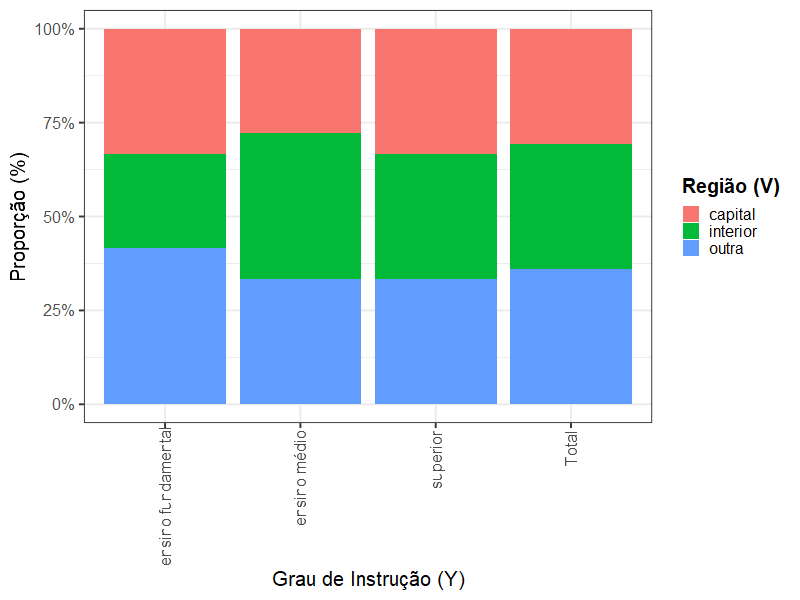

In [37]:
as_tibble(tab_prop_row, rownames = "grau_instrucao") |> 
  pivot_longer(cols = 2:4, names_to = "regiao", values_to = "valor") |> 
  ggplot(aes(x = grau_instrucao, y = valor, fill = regiao)) +
  geom_col(position = "stack") +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  labs(
    x = "Grau de Instrução (Y)",
    y = "Proporção (%)",
    fill = "Região (V)"
  ) +
  theme_bw(base_size = 20) +
  theme(
    legend.title = element_text(face = "bold"),
    axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1)
  )

Warning message:
In plot_theme(plot) :
  The `base_size` theme element is not defined in the element
hierarchy.


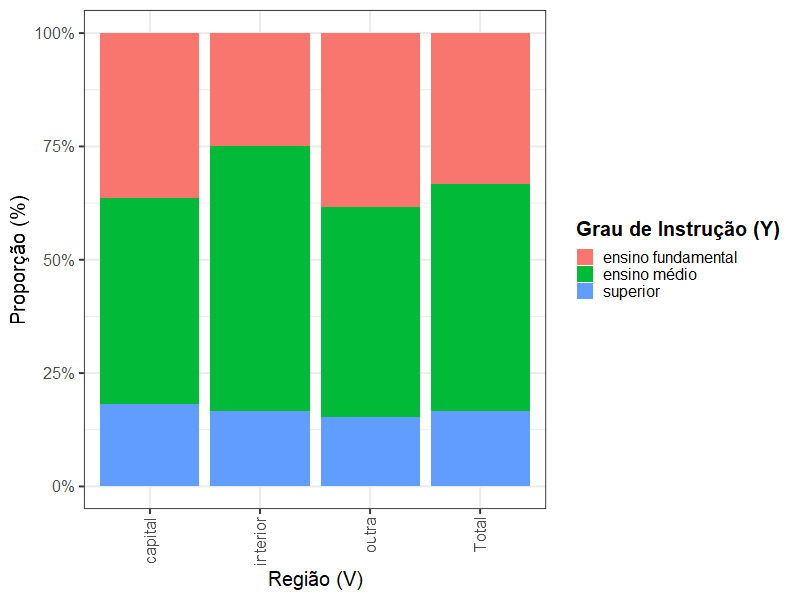

In [38]:
# transpor para que V fique no eixo x
as_tibble(tab_prop_col, rownames = "grau_instrucao") |> 
  pivot_longer(cols = 2:5, names_to = "regiao", values_to = "valor") |> 
  ggplot(aes(x = regiao, y = valor, fill = grau_instrucao)) +
  geom_col(position = "stack") +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  labs(
    x = "Região (V)",
    y = "Proporção (%)",
    fill = "Grau de Instrução (Y)"
  ) +
  theme_bw(base_size = 20) +
  theme(
    legend.title = element_text(face = "bold"),
    axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1)
  )


## Qui-quadrado de Pearson

Vamos primeiramente carregar a base dados de Cooperativas utilizada como exemplo na aula, para posteriormente obter a Tabela de Contingência (Valores Observados) e também e a Tabela de Valores Esperados.

In [39]:
url <- "https://raw.githubusercontent.com/caio-azevedo/estatistica_aplicada/refs/heads/main/Semana%201/cooperativa.csv"

df_coop <- read_csv2(url, locale = locale(decimal_mark = ",", encoding = "UTF-8"))

df_coop

Rows: 1551 Columns: 2
── Column specification ──────────────────────────────────────────────
Delimiter: ";"
chr (2): cooperativa, estado

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,551 × 2
   cooperativa estado   
   <chr>       <chr>    
 1 Consumidor  São Paulo
 2 Consumidor  São Paulo
 3 Consumidor  São Paulo
 4 Consumidor  São Paulo
 5 Consumidor  São Paulo
 6 Consumidor  São Paulo
 7 Consumidor  São Paulo
 8 Consumidor  São Paulo
 9 Consumidor  São Paulo
10 Consumidor  São Paulo
# ℹ 1,541 more rows
# ℹ Use `print(n = ...)` to see more rows

In [40]:
# Tabela de valores observados
tabela_obs <- addmargins(table(df_coop$estado, df_coop$cooperativa))

tabela_obs

               
                Consumidor Escola Outros Produtor  Sum
  Paraná                51    126     22      102  301
  Rio G. do Sul        111    139     48      304  602
  São Paulo            214     78    119      237  648
  Sum                  376    343    189      643 1551

In [41]:
# teste qui-quadrado de independência
chi <- chisq.test(table(df_coop$estado, df_coop$cooperativa), correct = F)

# Estatísticas
chi$statistic   # valor do qui-quadrado
chi$p.value     # p-valor
chi$parameter   # graus de liberdade

# Tabela de valores esperados
tabela_esp <- chi$expected |> addmargins()

# Exibir
tabela_esp

               
                Consumidor    Escola    Outros Produtor  Sum
  Paraná           72.9697  66.56544  36.67892 124.7859  301
  Rio G. do Sul   145.9394 133.13088  73.35783 249.5719  602
  São Paulo       157.0909 143.30368  78.96325 268.6422  648
  Sum             376.0000 343.00000 189.00000 643.0000 1551

Com as tabelas dos valores observados e esperados, podemos obter a tabela dos resíduos, isto é $O_{ij} - E_{ij}$

In [42]:
# Resíduos da tabela de contingência
residuos = tabela_obs - tabela_esp

residuos

               
                Consumidor     Escola     Outros   Produtor
  Paraná        -21.969697  59.434558 -14.678917 -22.785945
  Rio G. do Sul -34.939394   5.869117 -25.357834  54.428111
  São Paulo      56.909091 -65.303675  40.036750 -31.642166
  Sum             0.000000   0.000000   0.000000   0.000000
               
                       Sum
  Paraná          0.000000
  Rio G. do Sul   0.000000
  São Paulo       0.000000
  Sum             0.000000

 Depois elevar ao quadrado $(O_{ij} - E_{ij})^2$ e dividir por $E_{ij}$.

In [43]:
# Tabela com os valores de qui-quadrado
qui_quadrado = residuos**2/tabela_esp

qui_quadrado[1:3, ]

               
                Consumidor     Escola     Outros   Produtor
  Paraná         6.6146305 53.0675774  5.8745082  4.1607191
  Rio G. do Sul  8.3648508  0.2587418  8.7655223 11.8700037
  São Paulo     20.6163721 29.7589715 20.2998407  3.7269901
               
                       Sum
  Paraná         0.0000000
  Rio G. do Sul  0.0000000
  São Paulo      0.0000000

Por fim, basta somar todos os valores obtidos.

In [44]:
total = sum(qui_quadrado)

total

[1] 173.3787

Ou, poderíamos ter obtido diretamente este valor pelo seguinte comando:

In [45]:
# Medida de associação - estatística qui-quadrado e teste
chi <- chisq.test(table(df_coop$estado, df_coop$cooperativa))

chi$statistic   # valor do qui-quadrado

X-squared 
 173.3787 